# Библиотеки

Импортируем необходимые библиотеки



In [150]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Датасет

Загружаем данные

In [151]:
df = pd.read_csv("Titanic.csv")

Отобразим данные и проанализируем их

In [152]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [153]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Просматриваем распределение по числовым признакам для общей оценки

# Первичный анализ

Самый главный параметр на который нужно основываться и на основе которого будем проводить анализ и строить графики это поле Survived - выживаемость

Сразу видим пропуски в столбцах "Age" и "Cabin". Убедимся в этом, а также посмотрим на наличие пустых данных в других столбцах

In [154]:
df['Age'].isnull().sum()

177

In [155]:
df['Cabin'].isnull().sum()

687

In [156]:
df['Sex'].isnull().sum()

0

In [157]:
df['Pclass'].isnull().sum()

0

In [158]:
df['Fare'].isnull().sum()

0

In [159]:
df['Embarked'].isnull().sum()

2

Пока отметим эту информацию и посмотрим, что можно будет с ней сделать дальше, удалять поля и заполнять пропуски пока не будем



> Отлично, мы проанализировали данные. А также отметили поля, которые в последствиии можем удалить, но пока оставим, ведь они могут пригодиться



# Визуализация

Создадим графики для выявления важных взаимосвязей

Предлагаю посмотреть на выживаемость в зависимости от пола

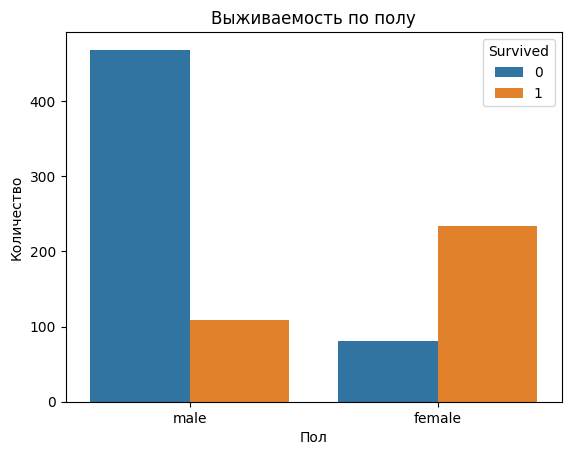

In [160]:
sns.countplot(df, x='Sex', hue='Survived')
plt.title('Выживаемость по полу')
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.show()

> Вывод: Женщины имеют значительно более высокий шанс на выживание, что логично и подтверждается реальным данным о погибших на титанике



Теперь посмотрим на выживаемость по классам

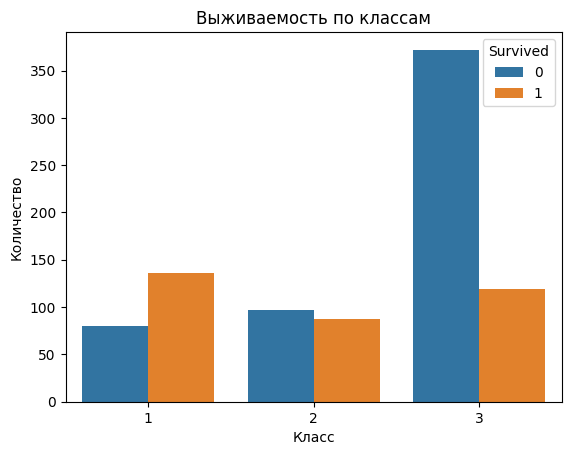

In [161]:
sns.countplot(df, x='Pclass', hue='Survived')
plt.title('Выживаемость по классам')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.show()

> Вывод: Пассажиры из первого класса выживали чаще, чем пассажиры из третьего, что указывает на социальное влияние при спасении

Логично, что на выживаемость непосредственно влияет возраст, поэтому посмотрим на распределение возраста и выживаемости

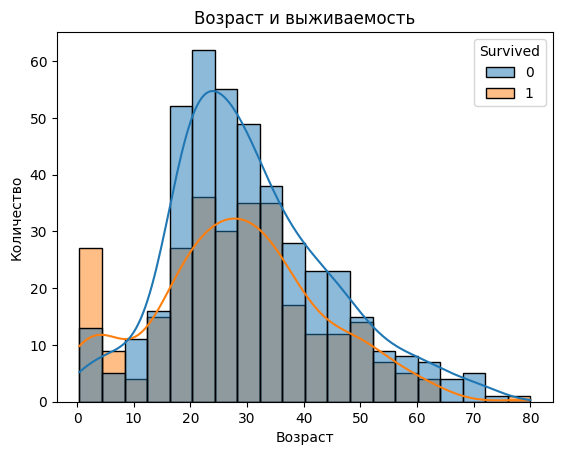

In [162]:
sns.histplot(df, x='Age', hue='Survived', kde=True)
plt.title('Возраст и выживаемость')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

> Вывод: Молодые пассажиры (особенно дети) имеют больший шанс на выживание, что также могло быть приоритетом при спасении. А в целом, распределение нормальное - люди среднего возраста выжили больше всего


Отобразим влияние количества родственников (братьев/сестер/супругов) на выживаемость

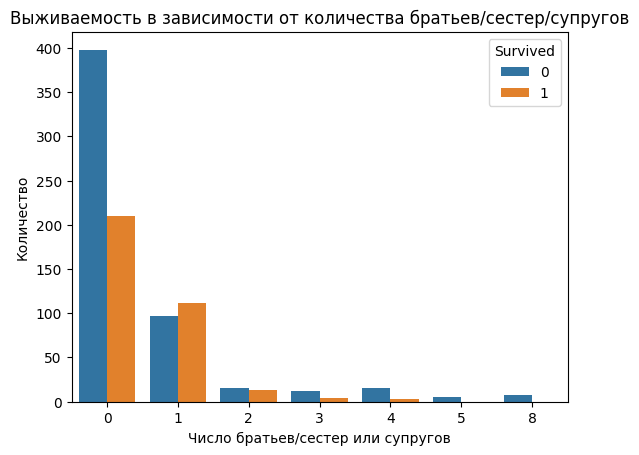

In [163]:
sns.countplot(df, x='SibSp', hue='Survived')
plt.title('Выживаемость в зависимости от количества братьев/сестер/супругов')
plt.xlabel('Число братьев/сестер или супругов')
plt.ylabel('Количество')
plt.show()

> Вывод: Пассажиры с небольшим числом родственников на борту имеют немного больший шанс на выживание

Посмотрим на влияние количества родителей/детей на выживаемость

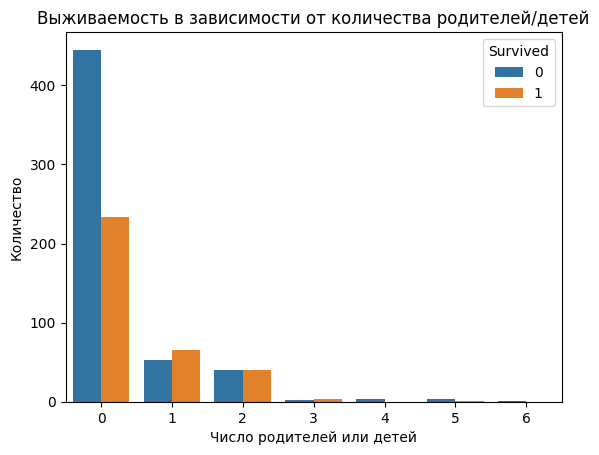

In [164]:
sns.countplot(df, x='Parch', hue='Survived')
plt.title('Выживаемость в зависимости от количества родителей/детей')
plt.xlabel('Число родителей или детей')
plt.ylabel('Количество')
plt.show()

> Вывод: Выживаемость также выше среди пассажиров с небольшим количеством родителей или детей на борту

Также надо посмотреть на влияние порта посадки на выживаемость

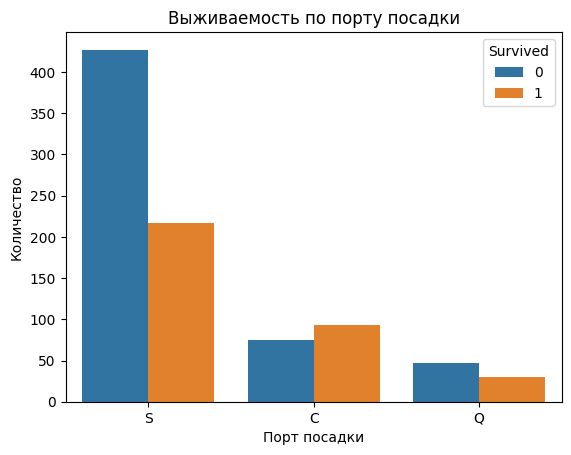

In [165]:
sns.countplot(df, x='Embarked', hue='Survived')
plt.title('Выживаемость по порту посадки')
plt.xlabel('Порт посадки')
plt.ylabel('Количество')
plt.show()

> Вывод: Пассажиры, севшие в порту Cherbourg, выживали чаще, чем те, кто сел в других портах

Посмотрим на корреляцию наших полей

In [168]:
df_numeric = df.select_dtypes(exclude = ['object', 'category'])

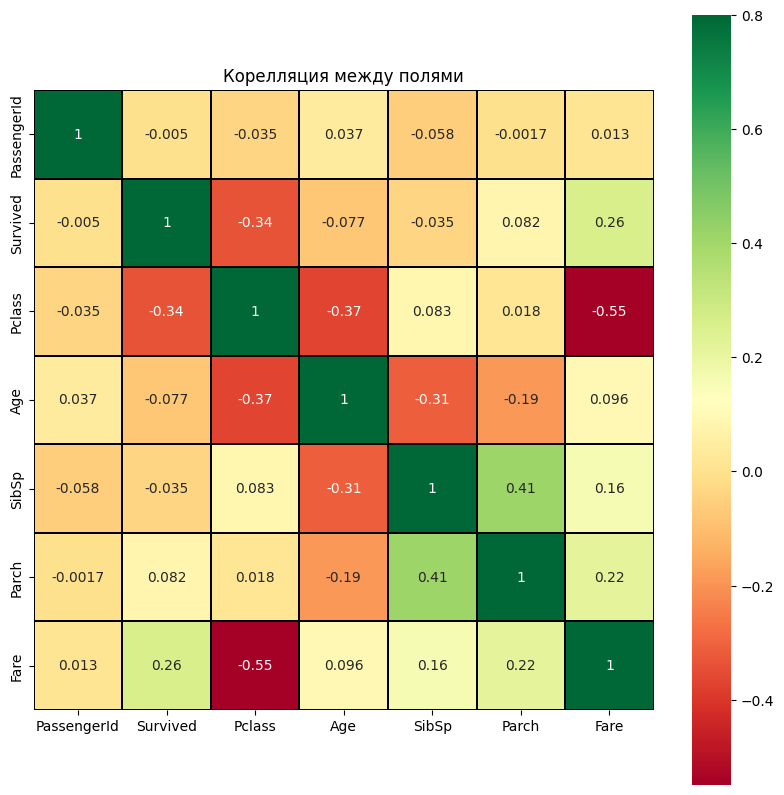

In [169]:
corr = df_numeric.corr()
plt.figure(figsize = (10, 10))
sns.heatmap(corr, vmax = .8, linewidths = 0.01, square = True, annot = True, cmap = 'RdYlGn', linecolor = 'black')
plt.title('Корелляция между полями')
plt.show()



> Ничего особо не выделяется. Разве что можем сделать вывод, что чем дороже билет, тем выше класс (обратная корреляция)



# Feature Engineering

Теперь на основе анализа создадим новые признаки

Добавим признак IsAlone, который будет показывать, путешествовал ли пассажир один или с родственниками. Путешествие с семьей или родственниками могло влиять на выживание, так как люди, находящиеся в группе помогают друг другу эвакуироваться, что повышает шансы человека в этой группе на выживаемость

In [170]:
# Добавляем признак IsAlone: 1 - если пассажир был один, 0 - если с родственниками
df['IsAlone'] = df.apply(lambda row: 1 if (row['SibSp'] + row['Parch']) == 0 else 0, axis=1)

Теперь посмотрим и проанализируем, как наличие родственников влияет на выживаемость, построив график

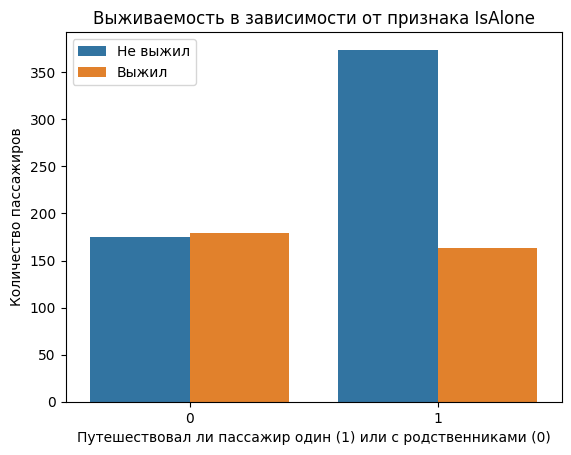

In [171]:
# Визуализация зависимости выживаемости от признака IsAlone
sns.countplot(x='IsAlone', hue='Survived', data=df)
plt.title('Выживаемость в зависимости от признака IsAlone')
plt.xlabel('Путешествовал ли пассажир один (1) или с родственниками (0)')
plt.ylabel('Количество пассажиров')
plt.legend(['Не выжил', 'Выжил'])
plt.show()



> Вывод: Пассажиры, путешествующие с семьей или родственниками, имели большие шансы на выживание, чем те, кто путешествовал один, что подтверждает мою догадку.



Добавим признак Title, который будет являться извлеченным званием из имени пассажира, например, Mr, Miss, Mrs, Master. Это может быть индикатором возраста и социального статуса, что также может оказывать влияние на выживаемость.

In [172]:
# Новый признак "Звание" из поля 'Name'
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

Посмотрим на зависимость Title от Survived

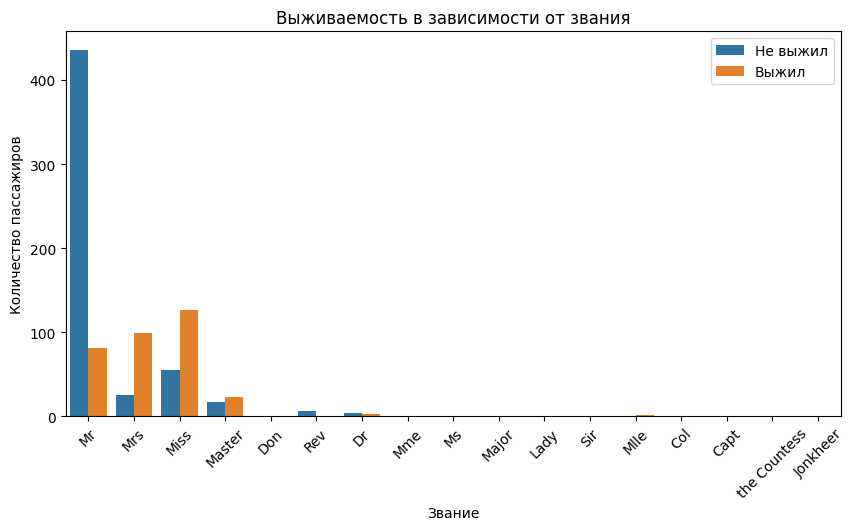

In [173]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Title', hue='Survived', data=df)
plt.title('Выживаемость в зависимости от звания')
plt.xlabel('Звание')
plt.ylabel('Количество пассажиров')
plt.legend(['Не выжил', 'Выжил'])
plt.xticks(rotation=45)
plt.show()



> Вывод: График показывает, что такие звания, как Miss, Mrs, и Master, ассоциируются с более высокой выживаемостью по сравнению с Mr. Это говорит о том, что социальный статус и возраст могли влиять на шансы пассажира на спасение.



# Предобработка и подготовка данных

Посмотрми на наши поля еще раз

In [174]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
IsAlone          0
Title            0
dtype: int64


Поля Name, PassengerId и Ticket не добавляют полезной информации, а также никак не влияют на выживаемость, поэтому удаляем их

In [175]:
# Удаляем поля Name, PassengerId и Ticket
df = df.drop(columns=['Name', 'PassengerId', 'Ticket'])

# Проверим данные ещё раз после удаления столбцов
print(df.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
IsAlone       0
Title         0
dtype: int64


Да, видим пропуски в полях "Age", "Cabin" и "Embarked", сейчас посмотрим, что можно сделать с ними

У нас есть 177 пропусков в поле "Age", а также 2 пропуска в поле "Embarked", предлагаю заполнить эти пропуски

In [176]:
# Age: Заполним медианным значением
df['Age'].fillna(df['Age'].median(), inplace=True)

# Embarked: Заполним наиболее частым значением - модой
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Проверим, что теперь нет пропущенных значений в полях "Age" и "Embarked"
print(df.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      0
IsAlone       0
Title         0
dtype: int64


<ipython-input-176-21d7bb7a03a5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-176-21d7bb7a03a5>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

Осталось поле Cabin с 687 нулевыми значениями, предлагаю удалить его, потому что пропусков слишком много (более 75%)

In [177]:
# Удаляем поле Cabin
df = df.drop(columns=['Cabin'])

# Проверим данные ещё раз после удаления столбцов
print(df.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
IsAlone     0
Title       0
dtype: int64


In [178]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


# Кодирование признака Sex в числовой формат
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])

# Кодирование категориальных признаков с помощью Label Encoding
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])
df['Title'] = label_encoder.fit_transform(df['Title'])

# Подготовка признаков и целевой переменной
X = df.drop(columns=['Survived'])
y = df['Survived']

# Разделение данных на обучающую и проверочную выборки
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Нормализация данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)


In [179]:
# Проверяем готовность данных
print("Форма обучающего набора:", X_train.shape)
print("Форма валидационного набора:", X_val.shape)

Форма обучающего набора: (712, 9)
Форма валидационного набора: (179, 9)


# Создание и обучение модели

Используем полносвязную нейронную сеть для предсказания выживаемости пассажиров. Модель будет состоять из нескольких слоев с функцией активации ReLU, и выходной слой с сигмоидной активацией для предсказания вероятности выживания

In [193]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense

# Создание модели нейронной сети
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))  # Первый скрытый слой
model.add(Dense(32, activation='relu'))  # Второй скрытый слой
model.add(Dense(1, activation='sigmoid'))  # Выходной слой (для бинарной классификации)

# Компиляция модели
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Обучение модели
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

# Предсказание на валидационном наборе
y_pred = (model.predict(X_val) > 0.5).astype("int32")  # Преобразуем вероятности в бинарные значения

# Вывод точности на валидационном наборе
val_accuracy = history.history['val_accuracy'][-1]
print(f"Точность на валидационном наборе: {val_accuracy:.4f}")


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7373 - loss: 0.6076 - val_accuracy: 0.7989 - val_loss: 0.5147
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7910 - loss: 0.5083 - val_accuracy: 0.8212 - val_loss: 0.4482
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8212 - loss: 0.4514 - val_accuracy: 0.8045 - val_loss: 0.4225
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8256 - loss: 0.4191 - val_accuracy: 0.7989 - val_loss: 0.4114
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8462 - loss: 0.3914 - val_accuracy: 0.7989 - val_loss: 0.4085
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8259 - loss: 0.4262 - val_accuracy: 0.8101 - val_loss: 0.4071
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8451 - loss: 0.3963 - val_accuracy: 0.8045 - val_loss: 0.4096
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8260 - loss: 0.4228 - val_accuracy: 0.8045 - val_loss: 0.4115
Ep

После обучения модели выведем графики метрик, чтобы проанализировать, как модель обучалась, и оценить ее качество на валидационном наборе данных.

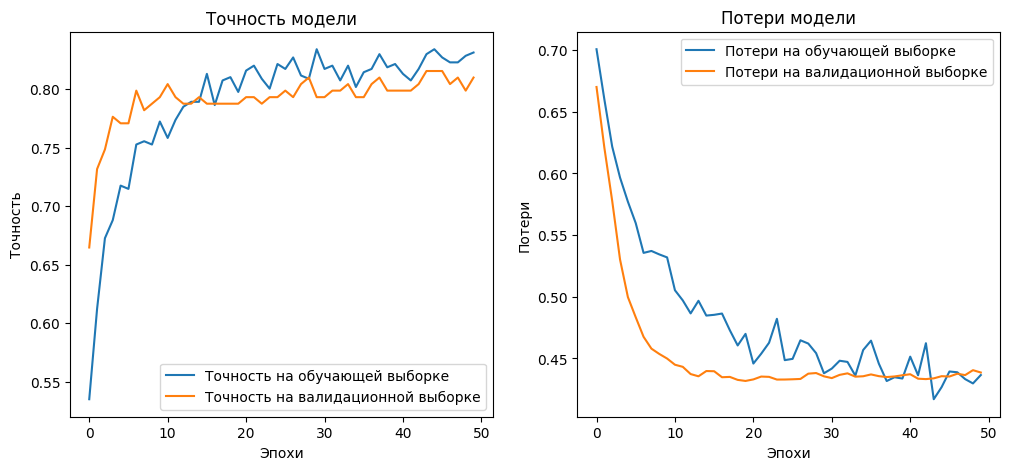

In [191]:
# График обучения и валидации
plt.figure(figsize=(12, 5))

# Точность
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Точность на обучающей выборке')
plt.plot(history.history['val_accuracy'], label='Точность на валидационной выборке')
plt.title('Точность модели')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()

# Потери
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Потери на обучающей выборке')
plt.plot(history.history['val_loss'], label='Потери на валидационной выборке')
plt.title('Потери модели')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()

plt.show()

В итоге, я получил точность на валидационном наборе: 0.8045. Далее я решил улучшить модель:

1.   Добавил слои Dropout, что может помочь предотвратить переобучение

2.   Увеличил кол-во эпох

3.   Добавил расшифровку матрицы ошибок



In [194]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Создание модели нейронной сети
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))  # Первый скрытый слой
model.add(Dropout(0.5))  # Добавляем Dropout с вероятностью 0.5
model.add(Dense(32, activation='relu'))  # Второй скрытый слой
model.add(Dropout(0.5))  # Добавляем Dropout во втором слое
model.add(Dense(1, activation='sigmoid'))  # Выходной слой (для бинарной классификации)

# Компиляция модели
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Обучение модели
history = model.fit(X_train, y_train, epochs=300, batch_size=32, validation_data=(X_val, y_val))

# Предсказание на валидационном наборе
y_pred = (model.predict(X_val) > 0.5).astype("int32")

# Оценка результатов
print("Classification Report:")
print(classification_report(y_val, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

# Вывод результатов
tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
print(f"Модель предсказала, что погибнет (fp): {fp}, а по факту не погиб (tn): {tn}")
print(f"Модель предсказала, что выживет (tp): {tp}, а по факту погиб (fn): {fn}")

# Вывод точности на валидационном наборе
val_accuracy = history.history['val_accuracy'][-1]
print(f"Точность на валидационном наборе: {val_accuracy:.4f}")

Epoch 1/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.5216 - loss: 0.7217 - val_accuracy: 0.7151 - val_loss: 0.6293
Epoch 2/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6968 - loss: 0.6328 - val_accuracy: 0.7709 - val_loss: 0.5673
Epoch 3/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7087 - loss: 0.5835 - val_accuracy: 0.7709 - val_loss: 0.5267
Epoch 4/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7141 - loss: 0.5716 - val_accuracy: 0.7709 - val_loss: 0.5008
Epoch 5/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7445 - loss: 0.5289 - val_accuracy: 0.7933 - val_loss: 0.4764
Epoch 6/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7771 - loss: 0.5193 - val_accuracy: 0.7989 - val_loss: 0.4608
Epoch 7/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7558 - loss: 0.5339 - val_accuracy: 0.8101 - val_loss: 0.4534
Epoch 8/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7956 - loss: 0.5036 - val_accuracy: 0.804

Результат стал не значительно, но все же лучше - Точность на валидационном наборе: 0.8156

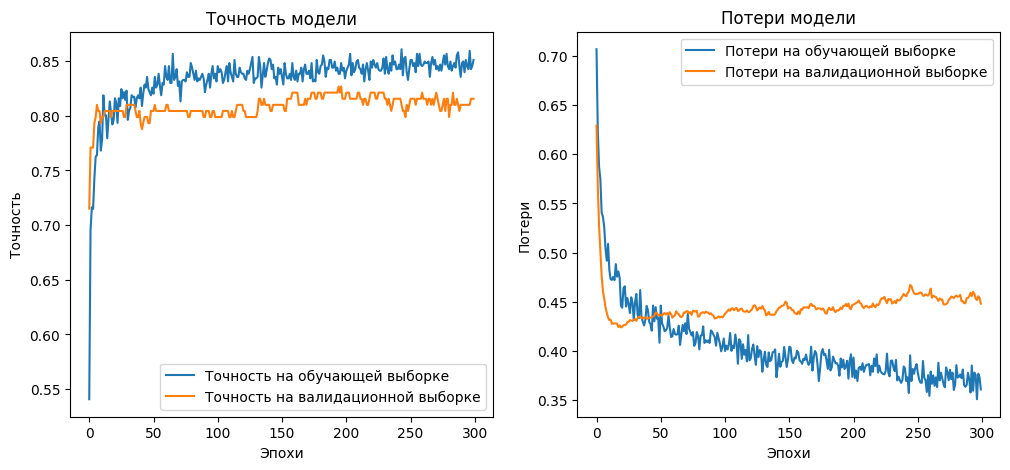

In [195]:
# График обучения и валидации
plt.figure(figsize=(12, 5))

# Точность
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Точность на обучающей выборке')
plt.plot(history.history['val_accuracy'], label='Точность на валидационной выборке')
plt.title('Точность модели')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()

# Потери
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Потери на обучающей выборке')
plt.plot(history.history['val_loss'], label='Потери на валидационной выборке')
plt.title('Потери модели')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()

plt.show()


# Вывод о проделанной работе

Работа над задачей предсказания выживаемости пассажиров Титаника включала несколько этапов: анализ данных, предварительная обработка, создание новых признаков, построение и обучение модели нейронной сети, кросс-валидация и анализ полученных результатов.

Я провел базовый анализ данных, выявив ключевые признаки, которые могут влиять на вероятность выживания. Построил графики и наглядно оценил свои предположения. Создал новые признаки, а также подготовил данные к обучению: удалил ненужные поля, заполнил пропущенные данные, закодировал категориальные признаки с помощью Label Encoding, а также разделил данные на обучающую и проверочную выборки.

Модель достигла хороших результатов, учитывая, что задача относится к сложной задаче бинарной классификации. Использование новых признаков (Title и IsAlone) улучшило понимание данных и качество предсказаний.

Я думаю, что дальнейшее улучшение точности можно достичь с помощью: Тюнинга гиперпараметров модели. Также можно попробовать более сложные архитектуры, такие как сверточные сети или использование других методов машинного обучения (например, градиентного бустинга).

Так, как я не имел опыта в работе с моделями нейронной сети, то было не просто выполнить эту работу, но для себя считаю, что я справился с этим. Работа была интересной!